<a href="https://colab.research.google.com/github/andymarlonrubioerazo/PrDS_2024__TelcoCustomerChurn/blob/main/eda_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.1/116.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.1/866.1 kB 45.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalli

In [24]:
import numpy as np
import pandas as pd

In [ ]:
import skimpy

## Premilinares
### Importacion

In [25]:
data= pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Corregir datos

In [ ]:
data.loc[ data['TotalCharges']== ' ' ]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
data.loc[ data['TotalCharges']== ' ' ] = np.NaN

In [ ]:
data['TotalCharges']= pd.to_numeric(data['TotalCharges'])

In [ ]:
data.apply( lambda x: 'si' if x['SeniorCitizen'] == 0 else 'no', axis=1)

0       si
1       si
2       si
3       si
4       si
        ..
7038    si
7039    si
7040    si
7041    no
7042    si
Length: 7043, dtype: object

In [ ]:
data['SeniorCitizen']= data.apply( lambda x: 'si' if x['SeniorCitizen'] == 0 else 'no', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   float64
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
import skimpy

In [ ]:
skimpy.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7043   │ │ string      │ 18    │                                                          │
│ │ Number of columns │ 21     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ tenure               │   11 │   0.16 │     32 │     25 │    1 │     9 │     29 │     55 │     72 │ ▇▃▃▃▃▅  │  │
│ │ MonthlyCharges       │   11 │   0.16 │     65 │     30 │   18 │    36 │     70 │     90 │    120 │ ▇▃▃▇▇▃  │  │
│ │ TotalCharges         │   11 │   0.16 │   2300 │   2300 │   19 │   400 │   1400 │   3800 │   8700 │ ▇▃▂▂▁▁  │  │
│ └──────────────────────┴──────┴────────┴────────┴────────┴──────┴───────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customerID                       │     11 │      0.16 │                          1 │                  7032 │  │
│ │ gender                           │     11 │      0.16 │                          1 │                  7032 │  │
│ │ SeniorCitizen                    │      0 │         0 │                          1 │                  7043 │  │
│ │ Partner                          │     11 │      0.16 │                          1 │                  7032 │  │
│ │ Dependents                       │     11 │      0.16 │                          1 │                  7032 │  │
│ │ PhoneService                     │     11 │      0.16 │                          1 │                  7032 │  │
│ │ MultipleLines                    │     11 │      0.16 │                        1.2 │                  8392 │  │
│ │ InternetService                  │     11 │      0.16 │                        1.4 │                 10128 │  │
│ │ OnlineSecurity                   │     11 │      0.16 │                        1.4 │                 10072 │  │
│ │ OnlineBackup                     │     11 │      0.16 │                        1.4 │                 10072 │  │
│ │ DeviceProtection                 │     11 │      0.16 │                        1.4 │                 10072 │  │
│ │ TechSupport                      │     11 │      0.16 │                        1.4 │                 10072 │  │
│ │ StreamingTV                      │     11 │      0.16 │                        1.4 │                 10072 │  │
│ │ StreamingMovies                  │     11 │      0.16 │                        1.4 │                 10072 │  │
│ │ Contract                         │     11 │      0.1

## EDA Bivariado

### Room 12

### Room 13

### Room 7

In [26]:
# Cruzamos las Variables vs V_Objetivo
tabla=pd.crosstab(data['Partner'],data['Churn'],margins=True, normalize=True)
tabla

Churn,No,Yes,All
Partner,,,
No,0.346585,0.170382,0.516967
Yes,0.388045,0.094988,0.483033
All,0.734630,0.265370,1.000000


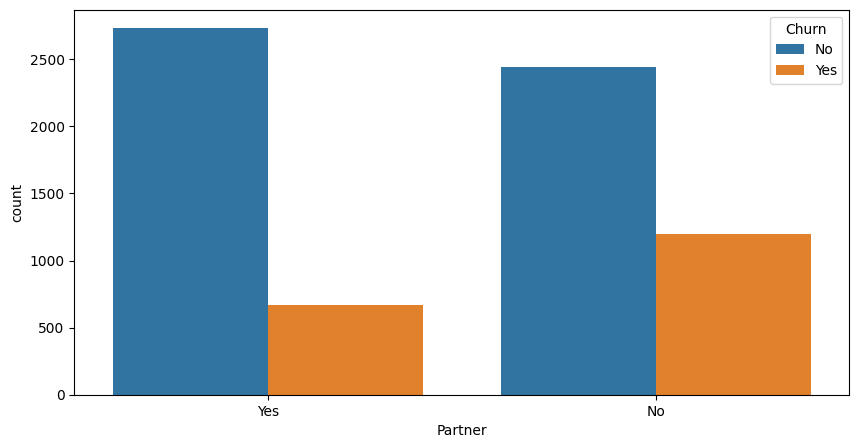

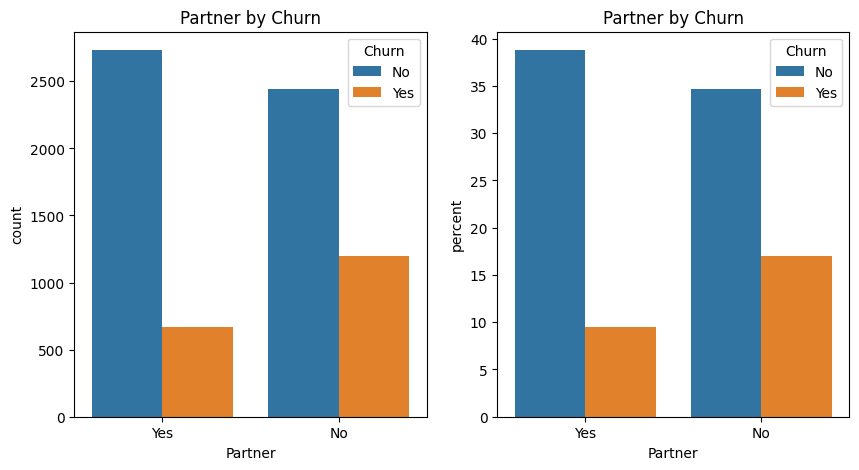

In [27]:
#Librerías para visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns ## seaborn requiere version 0.13.2 para compilar stat="percent"


plt.figure(figsize=(10,5))
sns.countplot(data=data,x= 'Partner', hue='Churn')#, stat="percent")
plt.show()

figure, axis = plt.subplots(1, 2,figsize=(10,5))

sns.countplot(ax=axis[0], data=data,x= 'Partner', hue='Churn')
axis[0].set_title('Partner by Churn')

sns.countplot(ax=axis[1],data=data,x= 'Partner', hue='Churn', stat="percent")
axis[1].set_title('Partner by Churn')

plt.show()


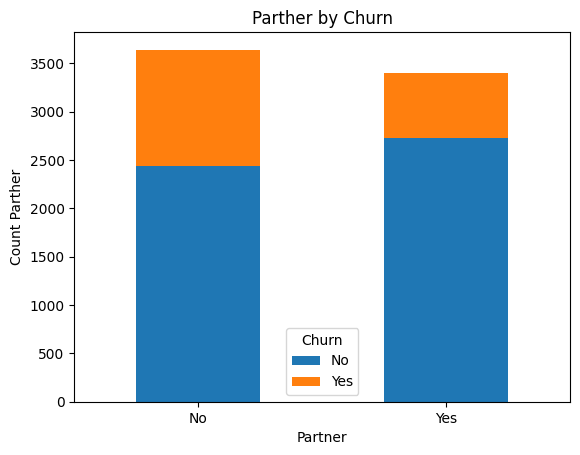

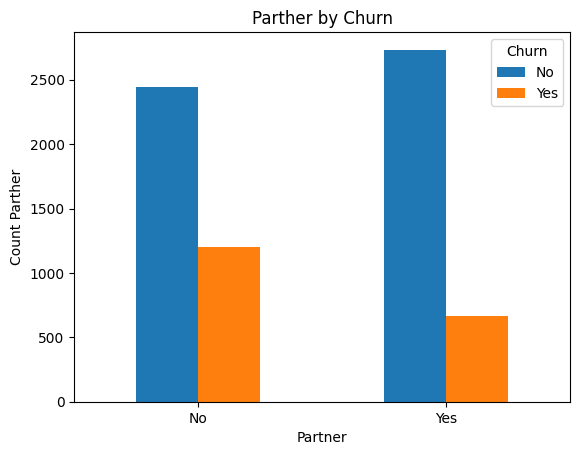

In [28]:
# importing the pandas library
#import pandas as pd
# Creating crosstab
crosstb = pd.crosstab(data.Partner, data.Churn)
# Creating barplot
crosstb.plot(kind="bar", stacked=True, rot=0)
#plt.xlabel('Parther')
plt.ylabel('Count Parther')
plt.title('Parther by Churn')
plt.show()

# importing the pandas library
#import pandas as pd
# Creating crosstab
crosstb = pd.crosstab(data.Partner, data.Churn)
# Creating barplot
crosstb.plot(kind="bar", rot=0)
#plt.xlabel('Parther')
plt.ylabel('Count Parther')
plt.title('Parther by Churn')
plt.show()


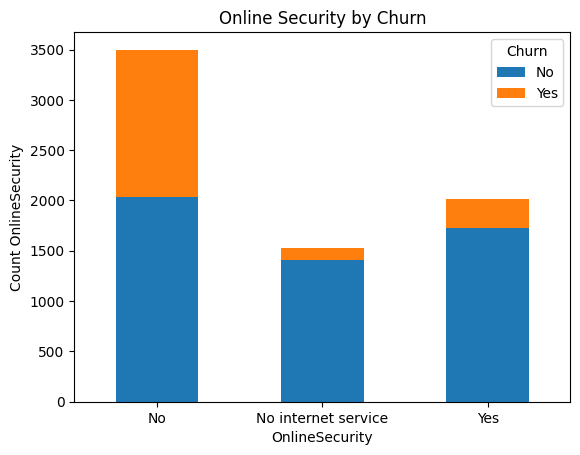

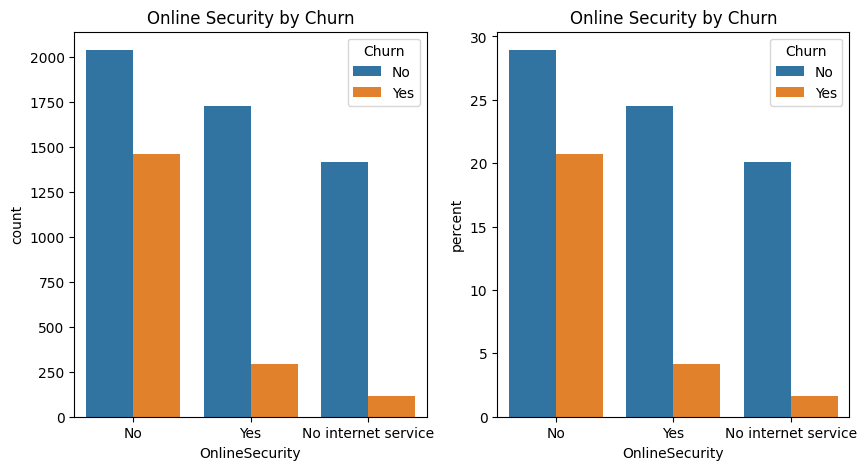

In [29]:
# Creating crosstab
pd.crosstab(data.OnlineSecurity, data.Churn).plot(kind="bar", stacked=True, rot=0)# Creating barplot
plt.xlabel('OnlineSecurity')
plt.ylabel('Count OnlineSecurity')
plt.title('Online Security by Churn')
plt.show()


figure, axis = plt.subplots(1, 2,figsize=(10,5))

sns.countplot(ax=axis[0], data=data,x= 'OnlineSecurity', hue='Churn')
axis[0].set_title('Online Security by Churn')

sns.countplot(ax=axis[1],data=data,x= 'OnlineSecurity', hue='Churn', stat="percent")
axis[1].set_title('Online Security by Churn')

plt.show()


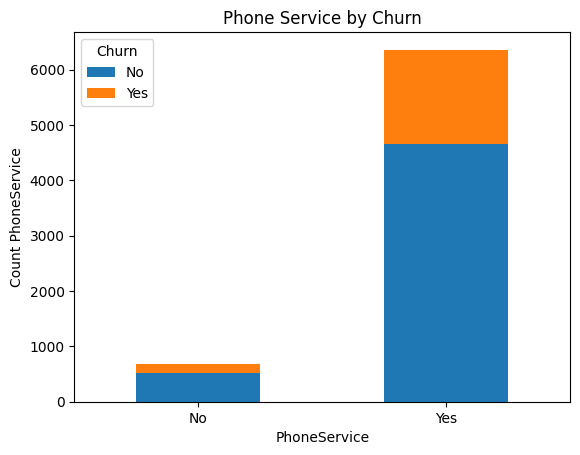

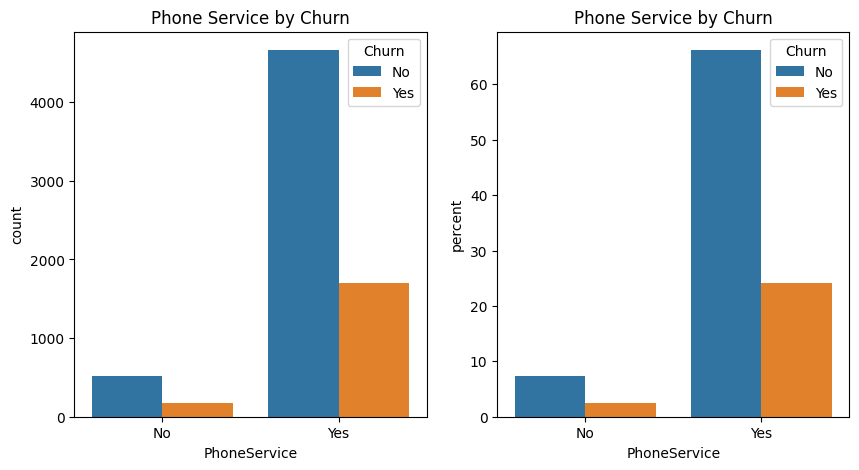

In [30]:
# Creating crosstab
pd.crosstab(data.PhoneService, data.Churn).plot(kind="bar", stacked=True, rot=0)# Creating barplot
#plt.xlabel('PhoneService')
plt.ylabel('Count PhoneService')
plt.title('Phone Service by Churn')
plt.show()

figure, axis = plt.subplots(1, 2,figsize=(10,5))

sns.countplot(ax=axis[0], data=data,x= 'PhoneService', hue='Churn')
axis[0].set_title('Phone Service by Churn')

sns.countplot(ax=axis[1],data=data,x= 'PhoneService', hue='Churn', stat="percent")
axis[1].set_title('Phone Service by Churn')

plt.show()

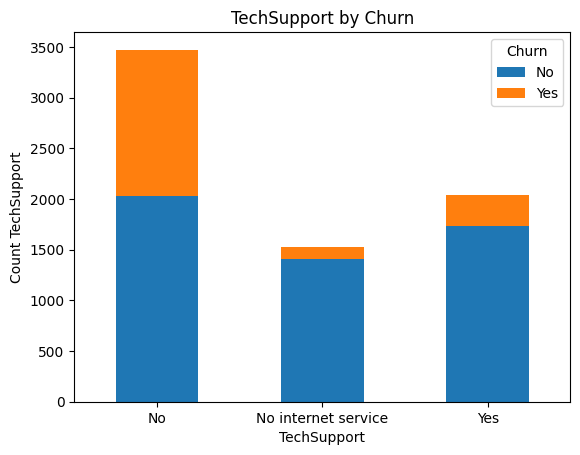

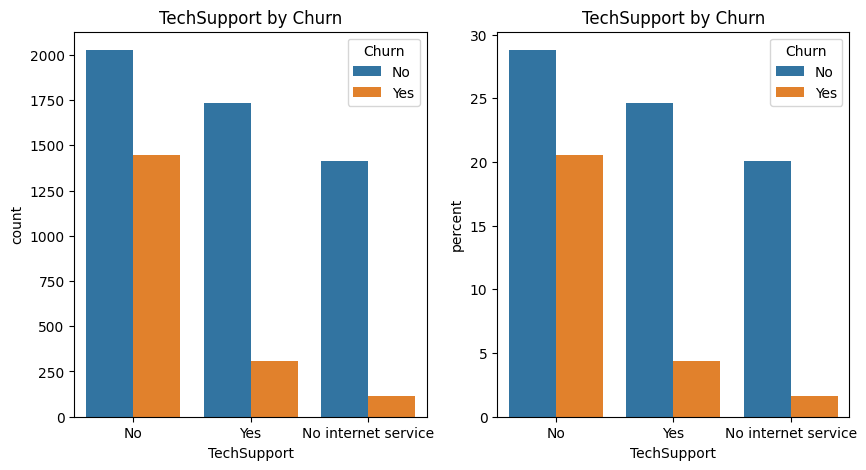

In [31]:
# Creating crosstab
pd.crosstab(data.TechSupport, data.Churn).plot(kind="bar", stacked=True, rot=0)# Creating barplot
plt.xlabel('TechSupport')
plt.ylabel('Count TechSupport')
plt.title('TechSupport by Churn')
plt.show()


figure, axis = plt.subplots(1, 2,figsize=(10,5))

sns.countplot(ax=axis[0], data=data,x= 'TechSupport', hue='Churn')
axis[0].set_title('TechSupport by Churn')

sns.countplot(ax=axis[1],data=data,x= 'TechSupport', hue='Churn', stat="percent")
axis[1].set_title('TechSupport by Churn')

plt.show()

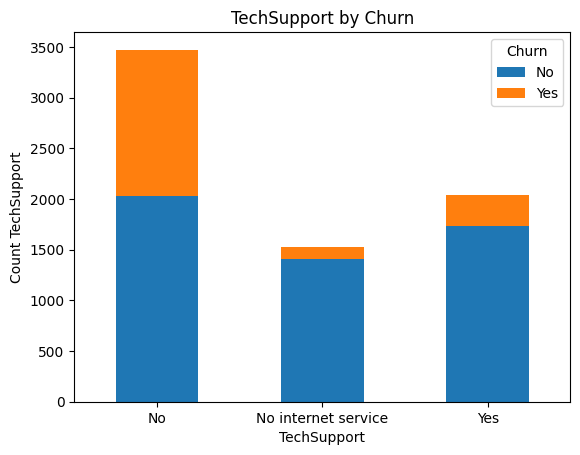

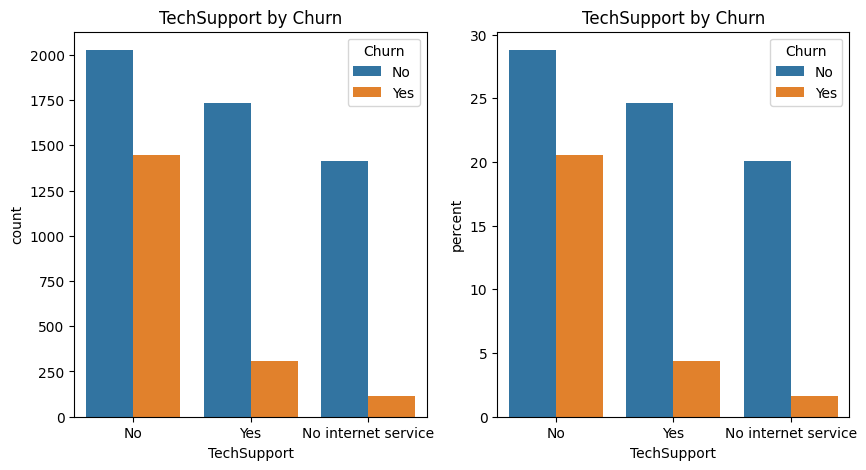

In [32]:
# Creating crosstab
pd.crosstab(data.TechSupport, data.Churn).plot(kind="bar", stacked=True, rot=0)# Creating barplot
plt.xlabel('TechSupport')
plt.ylabel('Count TechSupport')
plt.title('TechSupport by Churn')
plt.show()


figure, axis = plt.subplots(1, 2,figsize=(10,5))

sns.countplot(ax=axis[0], data=data,x= 'TechSupport', hue='Churn')
axis[0].set_title('TechSupport by Churn')

sns.countplot(ax=axis[1],data=data,x= 'TechSupport', hue='Churn', stat="percent")
axis[1].set_title('TechSupport by Churn')

plt.show()

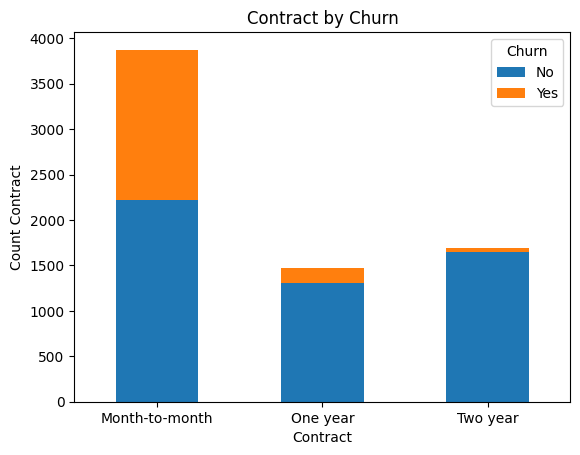

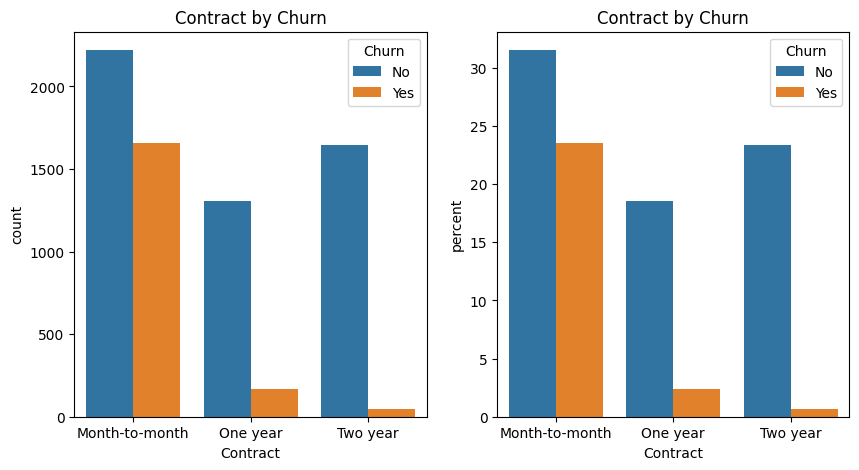

In [33]:
# Creating crosstab
pd.crosstab(data.Contract, data.Churn).plot(kind="bar", stacked=True, rot=0)# Creating barplot
#plt.xlabel('Contract')
plt.ylabel('Count Contract')
plt.title('Contract by Churn')
plt.show()

figure, axis = plt.subplots(1, 2,figsize=(10,5))

sns.countplot(ax=axis[0], data=data,x= 'Contract', hue='Churn')
axis[0].set_title('Contract by Churn')

sns.countplot(ax=axis[1],data=data,x= 'Contract', hue='Churn', stat="percent")
axis[1].set_title('Contract by Churn')

plt.show()

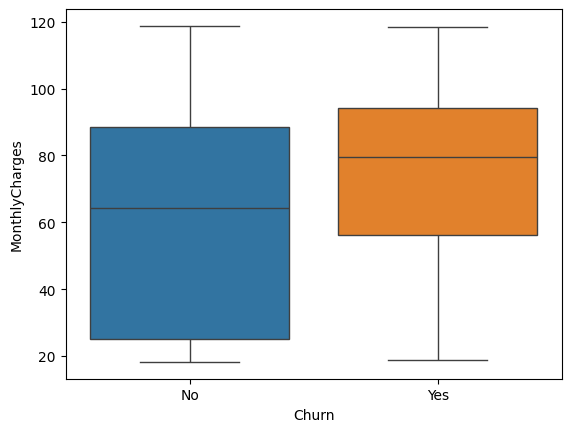

In [34]:
sns.boxplot(y = data['MonthlyCharges'], x=data['Churn'], hue = data['Churn'])
plt.show()


In [37]:
data1=data[['tenure','MonthlyCharges','TotalCharges']]
# Matriz de correlación
# ==============================================================================
corr_matrix = data1.corr(method='pearson')
corr_matrix

ValueError: could not convert string to float: ' '

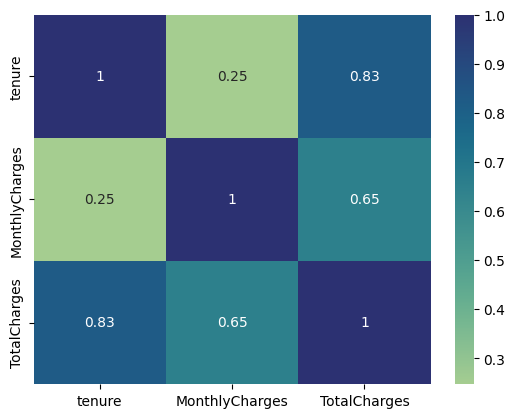

In [36]:
#plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True, cmap='crest')
#'crest', 'ocean', 'gist_earth', 'terrain','gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap','cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet','turbo', 'nipy_spectral', 'gist_ncar'
plt.show()

In [ ]:
b